## Introduction

This tutorial will introduce you to the World Development Indicators(WDI) dataset and how to use it to build time series models, bar plots of select indicators in the dataset and a time series prediction model. The source of the dataset is found [here](https://www.kaggle.com/worldbank/world-development-indicators). The WDI dataset comes from the [World Bank Group](https://data.worldbank.org/products/wdi). The WDI dataset is "The primary World Bank collection of development indicators, compiled from officially-recognized international sources. It presents the most current and accurate global development data available, and includes national, regional and global estimates." [from [site (https://data.worldbank.org/products/wdi)]. This dataset contains over a thousand annual indicators of economic development from hundreds of countries and country aggregates around the world [from here](https://www.kaggle.com/worldbank/world-development-indicators).

With over around a thousand indicators, inconsistent time periods, and a mix of aggregrate and countries there needs to be a certain level of clean up to represent something meaningful and readable to an audience.

In [1]:
%matplotlib inline

#Load Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
plt.style.use('ggplot')

To download the dataset just go to Kaggle [here](https://www.kaggle.com/worldbank/world-development-indicators) and press download. I'm assuming you have the unzipped folder on the same directory as this.

In [2]:
#Read in Data
indicators = pd.read_csv("world-development-indicators/Indicators.csv")

In [3]:
indicators.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


The indicators variable contains the CountryName, CountryCode, IndicatorName, IndicatorCode, Year, and Value. If you were to filter the table down by CountryName and select Arab World, and a certain IndicatorCode, Arms Exports for example, you would get a data set representing the change in time of Arms Export in the Arab World since 1960, when Arms Exports first started being measured. However, there may be missing values so that is always something to be aware of. If you try plotting a time series and there are issues resulting it's a potential issue to account for.

In [4]:
#All the countries and aggregrate in Indicators
indicators['CountryName'].unique()

array(['Arab World', 'Caribbean small states',
       'Central Europe and the Baltics',
       'East Asia & Pacific (all income levels)',
       'East Asia & Pacific (developing only)', 'Euro area',
       'Europe & Central Asia (all income levels)',
       'Europe & Central Asia (developing only)', 'European Union',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'High income: nonOECD', 'High income: OECD',
       'Latin America & Caribbean (all income levels)',
       'Latin America & Caribbean (developing only)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa (all income levels)',
       'Middle East & North Africa (developing only)', 'Middle income',
       'North America', 'OECD members', 'Other small states',
       'Pacific island small states', 'Small states', 'South Asia',
       'Sub-Saharan Afr

A few of those countries aren't countries, they're country aggregrates we wish to remove if we're going to be visualizing and plotting on an actual map. To filter by aggregrates or country you have to manually create a list of the aggregrates and countries since the base dataset does not differ them through any means.

In [5]:
#this is to get rid of indicators that aren't countries 
nonCountries = ['Arab World', 'Caribbean small states', 'Central Europe and the Baltics',
 'East Asia & Pacific (all income levels)',
 'East Asia & Pacific (developing only)', 'Euro area',
 'Europe & Central Asia (all income levels)',
 'Europe & Central Asia (developing only)', 'European Union',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)', 'High income',
 'High income: nonOECD', 'High income: OECD',
 'Latin America & Caribbean (all income levels)',
 'Latin America & Caribbean (developing only)',
 'Least developed countries: UN classification', 'Low & middle income',
 'Low income', 'Lower middle income',
 'Middle East & North Africa (all income levels)',
 'Middle East & North Africa (developing only)', 'Middle income',
 'North America' 'OECD members' ,'Other small states',
 'Pacific island small states', 'Small states', 'South Asia',
 'Sub-Saharan Africa (all income levels)',
 'Sub-Saharan Africa (developing only)' ,'Upper middle income' ,'World', 'North America', 'OECD members']

In [6]:
countriesBoolean = ~indicators.CountryName.isin(nonCountries)
nonCountriesBoolean = indicators.CountryName.isin(nonCountries)

In [7]:
countries = indicators[countriesBoolean]
nonCountries = indicators[nonCountriesBoolean]

In [8]:
countries.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
3492,Afghanistan,AFG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.453210e+02
3493,Afghanistan,AFG,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.171773e+01
3494,Afghanistan,AFG,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,5.086254e+00
3495,Afghanistan,AFG,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,7.663147e+01
3496,Afghanistan,AFG,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,4.000000e+07


In [9]:
nonCountries.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


As a result of my logical vectoring I've been able to split my dataset into two datasets for Country and Aggregrate. Using these two now I can further explore indicators and countries.

For example, imagine I do want to explore Arms Exports in the Arab World. I need to check the list of indicators [here](https://www.kaggle.com/benhamner/indicators-in-data), or I can run the code Ben Hamner created to maintain a local list of Indicators.

First I'm going to select the Arms Exports rows from the data using it's IndicatorCode. I'm checking it on the aggregrates to see if there's any missing region.

In [10]:
arms_exports_nonCountries = nonCountries[nonCountries.IndicatorCode == "MS.MIL.XPRT.KD"]

In [11]:
arms_exports_nonCountries.CountryName.unique()

array(['Arab World', 'Central Europe and the Baltics',
       'East Asia & Pacific (all income levels)',
       'East Asia & Pacific (developing only)', 'Euro area',
       'Europe & Central Asia (all income levels)',
       'Europe & Central Asia (developing only)', 'European Union',
       'Fragile and conflict affected situations', 'High income',
       'High income: nonOECD', 'High income: OECD',
       'Latin America & Caribbean (all income levels)',
       'Latin America & Caribbean (developing only)',
       'Low & middle income',
       'Middle East & North Africa (all income levels)',
       'Middle East & North Africa (developing only)', 'Middle income',
       'North America', 'OECD members',
       'Sub-Saharan Africa (all income levels)',
       'Sub-Saharan Africa (developing only)', 'Upper middle income',
       'Lower middle income', 'Low income',
       'Heavily indebted poor countries (HIPC)',
       'Least developed countries: UN classification', 'South Asia',
      

In [12]:
arms_exports_nonCountries.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
162,Central Europe and the Baltics,CEB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,5.000000e+06
234,East Asia & Pacific (all income levels),EAS,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,2.860000e+08
357,East Asia & Pacific (developing only),EAP,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,2.850000e+08
478,Euro area,EMU,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,1.494000e+09


In [13]:
data = arms_exports_nonCountries[["CountryName","Year","Value"]]
data.reset_index(inplace = True, drop = True)
data['Year'] = pd.to_datetime(data['Year'], format = "%Y")
data.head()

/Users/maria/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CountryName,Year,Value
0,Arab World,1960-01-01,3.000000e+06
1,Central Europe and the Baltics,1960-01-01,5.000000e+06
2,East Asia & Pacific (all income levels),1960-01-01,2.860000e+08
3,East Asia & Pacific (developing only),1960-01-01,2.850000e+08
4,Euro area,1960-01-01,1.494000e+09


To develop the time series plot of the country aggregrates throughout time I further subset the data and group it by Country Name so that when I loop through countries I can take the Year and Value of Arms Exports correctly.

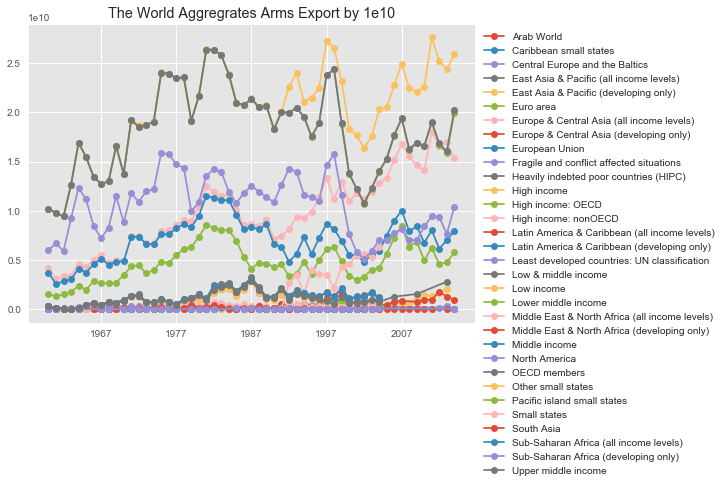

In [14]:
fig, ax = plt.subplots()

# multiline plot with group by
for key, grp in data.groupby(['CountryName']): 
    ax.plot_date(x = grp['Year'], y = grp['Value'], ls = "solid", label = "{}".format(key))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('The World Aggregrates Arms Export by 1e10')
plt.show()

From this plot it's really hard to determine which specific aggregrate group internationally wide sells the most arms. The highest trend line which only appeared in the 1990s probably correlates with wealthy and prosperous countries who can sell and support an Arms Industry.

To check this I sort the values of the dataset and my guess seems correct, the most prosperous nations of the 1st world in Europe and North America gain the most value from the Arms Trade while conflicted and poor nations, and the Arab world, gain the least from it.

In [15]:
data.sort_values(by = 'Value', ascending = False)

,CountryName,Year,Value
1202,High income,2011-01-01,2.761400e+10
933,High income,1997-01-01,2.721600e+10
961,High income,1998-01-01,2.654200e+10
503,High income,1981-01-01,2.641600e+10
529,High income,1982-01-01,2.636600e+10
541,OECD members,1982-01-01,2.636300e+10
531,High income: OECD,1982-01-01,2.636300e+10
515,OECD members,1981-01-01,2.635500e+10
505,High income: OECD,1981-01-01,2.634400e+10
1233,High income,2014-01-01,2.590000e+10


But looking at income through another level we can look at how the World Bank classification has changed from the 1960s until now. But first you'll need to look at the indicators table again to choose. I've settled on NY.GNP.PCAP.KD, it's the GNI per capita (constant 2005 USdollar), Gross National Income per Capita at the 2005 level should be able to tell us the normalized levels of wealth per aggregrate at the 2005 US dollar level.

In [19]:
aggregateIncome2014 = nonCountries[(nonCountries.IndicatorCode == 'NY.GNP.PCAP.KD') & (nonCountries.Year == 2014)].sort_values(by = 'Value', ascending = True)
aggregateIncome1962 = nonCountries[(nonCountries.IndicatorCode == 'NY.GNP.PCAP.KD') & (nonCountries.Year == 1962)].sort_values(by = 'Value', ascending = True)

print(aggregateIncome2014.shape)
print(aggregateIncome1962.shape)

(18, 6)
(5, 6)


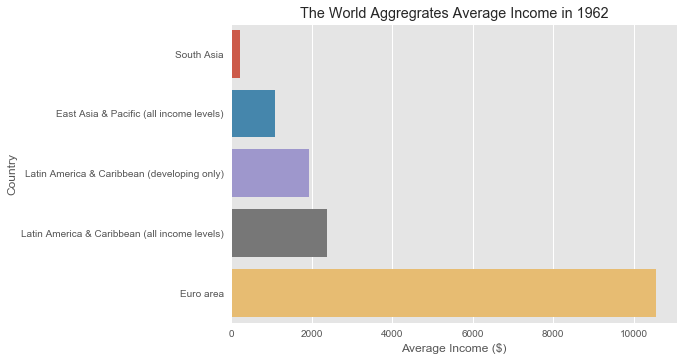

In [20]:
fig = plt.subplots()

graph1 = sns.barplot(x = "Value", y = "CountryName", data = aggregateIncome1962, orient = "h")
plt.xlabel('Average Income ($)')
plt.ylabel('Country')
plt.title('The World Aggregrates Average Income in 1962')

One thing that was not accounted for was the lack of measurements being taken in 1962, a different aggregrate might result in more fine tuned measurements. There doesn't seem to be a reason as to why the North American aggregrate is missing. 

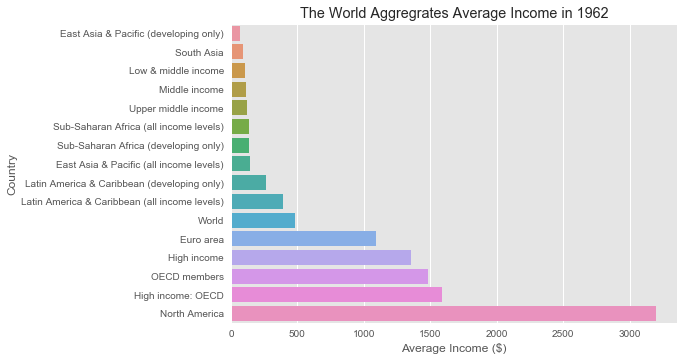

In [21]:
aggregateIncome1962CD = nonCountries[(nonCountries.IndicatorCode == 'NY.GNP.PCAP.CD') & (nonCountries.Year == 1962)].sort_values(by = 'Value', ascending = True)
fig = plt.subplots()

graph1 = sns.barplot(x = "Value", y = "CountryName", data = aggregateIncome1962CD, orient = "h")
plt.xlabel('Average Income ($)')
plt.ylabel('Country')
plt.title('The World Aggregrates Average Income in 1962')

This seems far more reasonable and it also includes North America. The Vietnam War ocurred through 1955 and 1975 and it didn't solely impact Vietnam and America, it impacted southeast asia as a whole which easily explains why a war torn region is so low on income. 

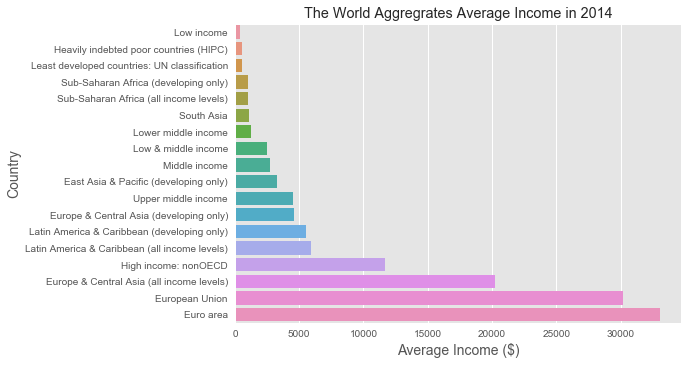

In [22]:
fig = plt.subplots()

graph1 = sns.barplot(x = "Value", y = "CountryName", data = aggregateIncome2014)
plt.xlabel('Average Income ($)', fontsize = 14)
plt.ylabel('Country',  fontsize=14)
plt.title('The World Aggregrates Average Income in 2014')

This last representation of income includes finer categories, a point to make here is that there is overlap in certain aggregrates from certain others, for example, an aggregrate of Latin America & the Carribbean would include the developing countries of it though those are already represented by their own aggregrates.

But onwards to modeling indicators. One thing the data has is that some variables have not been measured since before 2015. An example is a full set of environmental variables that haven't been measured since 2010. Perhaps there's a time series model that can represent the trends of the time series to allow us to determine if it will keep increasing, decreasing, or if it has too much variation to be gauged.

For this specific parameter I want to analyze it on the US.

In [24]:
america = indicators[(indicators.CountryName == "United States")]

In [25]:
america.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22220,United States,USA,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,84.987200
22221,United States,USA,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,66.524844
22222,United States,USA,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,15.230264
22223,United States,USA,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,51.294580
22224,United States,USA,Alternative and nuclear energy (% of total ene...,EG.USE.COMM.CL.ZS,1960,1.261261


To acquire indicators that match a certain type you can query through the words that they start with, you can also look [here](https://data.worldbank.org/indicator) for the groups of indicators that exist. There's 20 big categorical variables that correlate with the first two indices code you see, SP refers to Social Protection & Labor but the other references can be matched there.

In [26]:
envUSA = america[america.IndicatorCode.apply(lambda x: str(x).startswith("EN"))]
envUSA.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22230,United States,USA,CO2 emissions (kg per 2005 US$ of GDP),EN.ATM.CO2E.KD.GD,1960,1.033397e+00
22231,United States,USA,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,2.890696e+06
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,1.599978e+01
22233,United States,USA,CO2 emissions from electricity and heat produc...,EN.CO2.ETOT.ZS,1960,2.771343e+01
22234,United States,USA,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,2.181276e+01


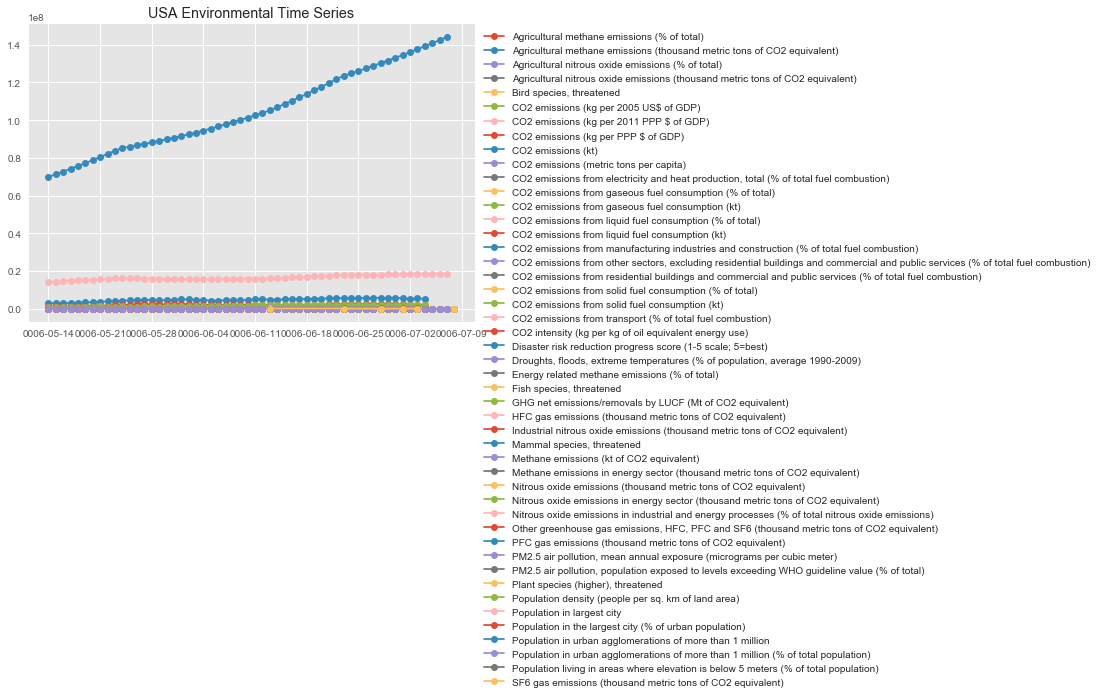

In [27]:
fig, ax = plt.subplots()

# multiline plot with group by
for key, grp in envUSA.groupby(['IndicatorName']): 
    ax.plot_date(x = grp['Year'], y = grp['Value'], ls = "solid", label = "{}".format(key))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('USA Environmental Time Series')
plt.show()

To try and remove the indicators that's pushing everything else down I'm going to run sort_values. After running this twice it resulted that MCTY and LCTY were the two greatest obfuscators for the rest of the time series.

In [28]:
envUSA.sort_values(by = 'Value', ascending = False).head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5637463,United States,USA,Population in urban agglomerations of more tha...,EN.URB.MCTY,2014,144192509.0
5527747,United States,USA,Population in urban agglomerations of more tha...,EN.URB.MCTY,2013,142507280.0
5370331,United States,USA,Population in urban agglomerations of more tha...,EN.URB.MCTY,2012,140858582.0
5195179,United States,USA,Population in urban agglomerations of more tha...,EN.URB.MCTY,2011,139240988.0
5018540,United States,USA,Population in urban agglomerations of more tha...,EN.URB.MCTY,2010,137660260.0


The time series plot of environmental data is pretty hard to see due to the great increase in Population, Urban, and later on Local, no other time series can be correlated due to difficulty viewing.

In [29]:
woCO2 = envUSA[(indicators.IndicatorCode != "EN.URB.MCTY") & (indicators.IndicatorCode != "EN.URB.LCTY") ]

/Users/maria/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


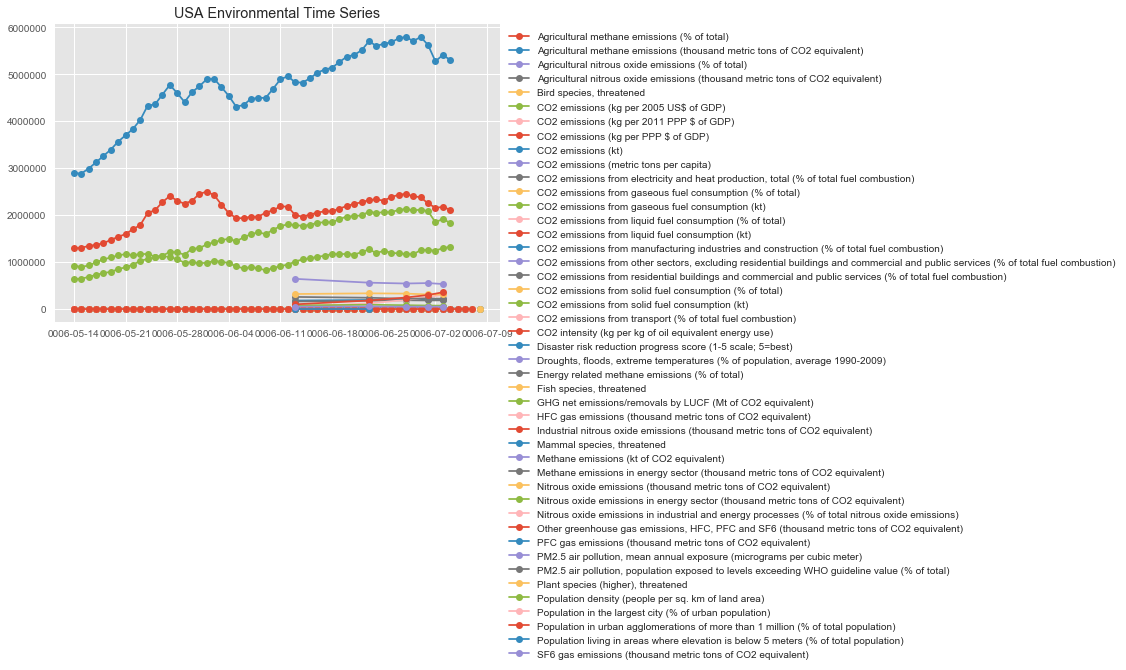

In [30]:
fig, ax = plt.subplots()

# multiline plot with group by
for key, grp in woCO2.groupby(['IndicatorName']): 
    ax.plot_date(x = grp['Year'], y = grp['Value'], ls = "solid", label = "{}".format(key))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('USA Environmental Time Series')
plt.show()

In [31]:
woCO2.sort_values(by = 'Value', ascending = False).head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4115298,United States,USA,CO2 emissions (kt),EN.ATM.CO2E.KT,2005,5795161.785
4472813,United States,USA,CO2 emissions (kt),EN.ATM.CO2E.KT,2007,5794923.430
3935695,United States,USA,CO2 emissions (kt),EN.ATM.CO2E.KT,2004,5763456.903
4292491,United States,USA,CO2 emissions (kt),EN.ATM.CO2E.KT,2006,5703871.820
3318906,United States,USA,CO2 emissions (kt),EN.ATM.CO2E.KT,2000,5701829.301


The below function is developed by Aarshay Jain at [analyticsvidhya](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/). Time Series data usually has a common set of assumptions regarding seasonality, trends, mean and variance that underly any prediction model that tries to predict them. We can't assume any of that with our Time Series data since they're real world data that do not follow any fixed distributions such as the Normal or Exponential. Despite this however we can still test if there's a form of stationarity, an important trait for time series, in any of our environmental variables.

In [33]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/Users/maria/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [32]:
coTS = woCO2[(woCO2.IndicatorName == "CO2 emissions (kt)")][["Year","Value"]]

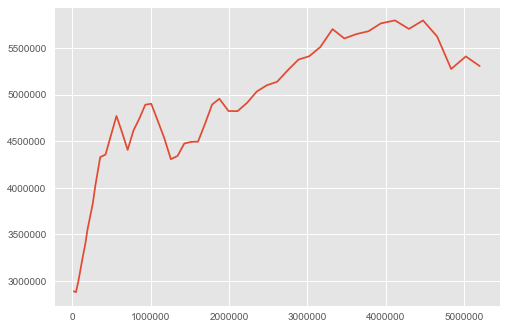

In [34]:
plt.plot(coTS["Value"])

/Users/maria/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/Users/maria/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


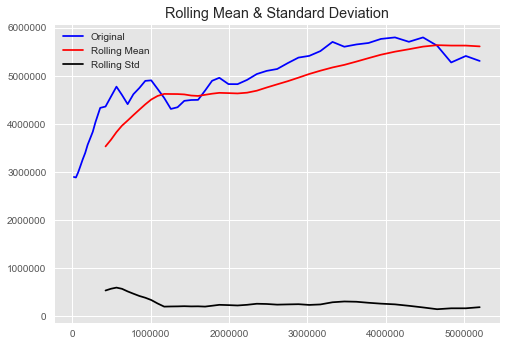

Results of Dickey-Fuller Test:
Test Statistic                 -2.650328
p-value                         0.083035
#Lags Used                      1.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64


In [35]:
test_stationarity(coTS["Value"])

In [ ]:
coTS = woCO2[(woCO2.IndicatorName == "CO2 emissions (kt)")][["Year","Value"]]